In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model 

In [2]:
#Dataset from 'https://lazyprogrammer.me/course_files/spam.csv' 
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [6]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [7]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [8]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found', V, 'unique tokens.')

Found 7214 unique tokens.


In [9]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [10]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [11]:
D = 20 #Embedding dimensionality

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i) #V + 1 for all tokens in word index plus unknown(0)
x = Conv1D(32, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

r = model.fit(
    data_train, Ytrain,
    epochs = 5,
    validation_data = (data_test, Ytest)
)

Epoch 1/5
117/117 [==============================] - 11s 14ms/step - loss: 0.3826 - accuracy: 0.8653 - val_loss: 0.2925 - val_accuracy: 0.8575
Epoch 2/5
117/117 [==============================] - 1s 10ms/step - loss: 0.1082 - accuracy: 0.9550 - val_loss: 0.0933 - val_accuracy: 0.9766
Epoch 3/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0819 - val_accuracy: 0.9793
Epoch 4/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.1001 - val_accuracy: 0.9821
Epoch 5/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.1011 - val_accuracy: 0.9826


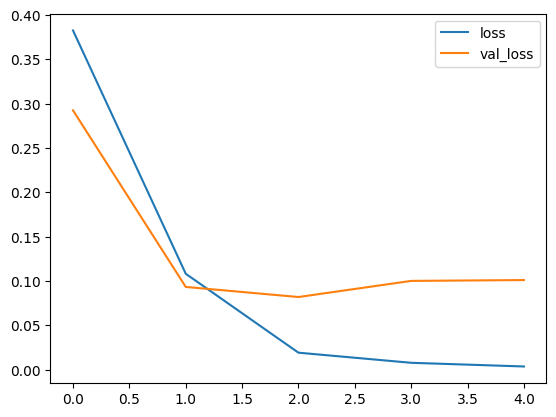

In [13]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

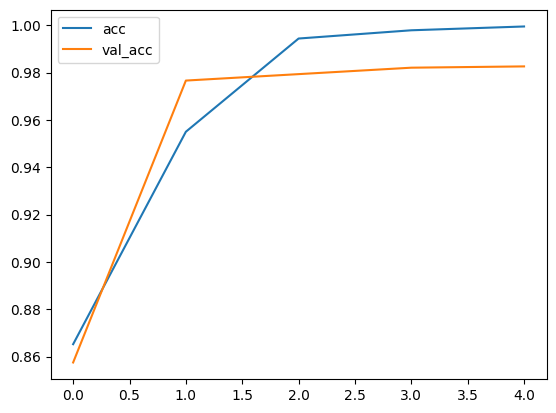

In [14]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()